In [3]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
import os
path = os.getcwd()
print(path)
sys.path.insert(0, path)
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

C:\Users\Sevrn\Desktop\C#\unifloc_net\test
import excel with unifloc vba done. version 7.25


In [4]:
import sys
import clr
import DLLs
from ctypes import *
import os
path = os.path.abspath('..')
cur_path = path + '\\u7_excel\\bin\\Debug'

sys.path.append(f'{cur_path}')
clr.AddReference('alglibnet2')
clr.AddReference('UnfClassLibrary')
clr.AddReference('u7_excel')

import UnfClassLibrary
import u7_excel

In [7]:
pvt_str = u7_excel.u7_Excel_function_servise.PVT_encode_string(0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1)
test_choke = u7_excel.u7_Excel_functions_MF.MF_calibr_choke_fast(qliq_sm3day=50, fw_perc=20, d_choke_mm=15, p_in_atma=60, p_out_atma=50, str_PVT=pvt_str)
bg = u7_excel.u7PVT.PVT_bg_m3m3(260, 80, 0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1)
print(pvt_str)
print(bg)
print(test_choke)

{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":80.0,"rp_m3m3":80.0,"pb_atma":125.0,"t_res_C":100.0,"bob_m3m3":1.2,"muob_cP":1.0,"ksep_fr":-1.0,"p_ksep_atma":-1.0,"t_ksep_C":-1.0}
0.005001406420466044
System.Object[]


Импорт необходимых модулей

In [8]:
import numpy as np
import matplotlib as mpl
from matplotlib import pylab as plt

Расчет базовых PVT свойств нефти

In [9]:
p_0 = 10
p_n = 460
dp = 20 
p_atm = np.arange(p_0, p_n, dp) #
t_C = 80 #
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1.1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 125 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
PVTcorr = 0; # Выбор набора корреляций для расчета;
# Зададим параметры сепарации для учета влияния на свойства флюида
Ksep_ = 0.5 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
Psep_ = 50 # давление при которой была сепарация, атм;
Tsep = 80 # температура при которой была сепарция, С;
gas_only = False
pb_list, rs_list, mu_oil_list, compr_oil_list, bo_list, rho_oil_list, cpo_list  = [], [], [], [], [], [], []
z_list, rho_gas_list, mu_gas_list,compr_gas_list, bg_list, cpg_list = [], [], [], [], [], []
rho_wat_list, mu_wat_list, compr_wat_list, bw_list, cpw_list = [], [], [], [], []
ST_og_list, ST_wg_list = [], []
pb_list_choke, rs_list_choke, mu_oil_list_choke, compr_oil_list_choke, bo_list_choke, rho_oil_list_choke, cpo_list_choke  = [], [], [], [], [], [], []
z_list_choke, rho_gas_list_choke, mu_gas_list_choke,compr_gas_list_choke, bg_list_choke, cpg_list_choke = [], [], [], [], [], []
rho_wat_list_choke, mu_wat_list_choke, compr_wat_list_choke, bw_list_choke, cpw_list_choke = [], [], [], [], []
ST_og_list_choke, ST_wg_list_choke = [], []
for p in p_atm:
    pb = UniflocVBA.PVT_pb_atma(t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    pb_list.append(pb)
    z = UniflocVBA.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    z_list.append(z)
    rs = UniflocVBA.PVT_rs_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rs_list.append(rs)
    mu_oil_cP = UniflocVBA.PVT_mu_oil_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_oil_list.append(mu_oil_cP)
    compr_oil_1atm = UniflocVBA.PVT_compressibility_oil_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_oil_list.append(compr_oil_1atm)
    b_bo_m3m3 = UniflocVBA.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bo_list.append(b_bo_m3m3)
    rho_oil_kgm3 = UniflocVBA.PVT_rho_oil_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_oil_list.append(rho_oil_kgm3)
    rho_gas_kgm3 = UniflocVBA.PVT_rho_gas_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_gas_list.append(rho_gas_kgm3)
    cpo = UniflocVBA.PVT_cp_oil_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpo_list.append(cpo)
    mu_gas_cp = UniflocVBA.PVT_mu_gas_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_gas_list.append(mu_gas_cp)
    compr_gas_1atm = UniflocVBA.PVT_compressibility_gas_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_gas_list.append(compr_gas_1atm)
    b_gas_m3m3 = UniflocVBA.PVT_bg_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bg_list.append(b_gas_m3m3)
    cpg = UniflocVBA.PVT_cp_gas_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpg_list.append(cpg)
    rho_wat_kgm3 = UniflocVBA.PVT_rho_wat_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_wat_list.append(rho_wat_kgm3)
    mu_wat_cp = UniflocVBA.PVT_mu_wat_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_wat_list.append(mu_wat_cp)
    compr_wat_1atm = UniflocVBA.PVT_compressibility_wat_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_wat_list.append(compr_wat_1atm)
    b_wat_m3m3 = UniflocVBA.PVT_bw_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bw_list.append(b_wat_m3m3)
    cpw = UniflocVBA.PVT_cp_wat_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpw_list.append(cpw)
    ST_og = UniflocVBA.PVT_ST_oilgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_og_list.append(ST_og)
    ST_wg = UniflocVBA.PVT_ST_watgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_wg_list.append(ST_wg)
    
    pb_ = u7_excel.u7PVT.PVT_pb_atma(t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    pb_list_choke.append(pb_)
    z_ = u7_excel.u7PVT.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    z_list_choke.append(z_)
    rs_ = u7_excel.u7PVT.PVT_rs_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rs_list_choke.append(rs_)
    mu_oil_cP_ = u7_excel.u7PVT.PVT_mu_oil_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_oil_list_choke.append(mu_oil_cP_)
    compr_oil_1atm_ = u7_excel.u7PVT.PVT_compressibility_oil_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_oil_list_choke.append(compr_oil_1atm_)
    b_bo_m3m3_ = u7_excel.u7PVT.PVT_bo_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bo_list_choke.append(b_bo_m3m3_)
    rho_oil_kgm3_ = u7_excel.u7PVT.PVT_rho_oil_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_oil_list_choke.append(rho_oil_kgm3_)
    rho_gas_kgm3_ = u7_excel.u7PVT.PVT_rho_gas_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_gas_list_choke.append(rho_gas_kgm3_)
    cpo_ = u7_excel.u7PVT.PVT_cp_oil_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpo_list_choke.append(cpo_)
    mu_gas_cp_ = u7_excel.u7PVT.PVT_mu_gas_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_gas_list_choke.append(mu_gas_cp_)
    compr_gas_1atm_ = u7_excel.u7PVT.PVT_compressibility_gas_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_gas_list_choke.append(compr_gas_1atm_)
    b_gas_m3m3_ = u7_excel.u7PVT.PVT_bg_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bg_list_choke.append(b_gas_m3m3_)
    cpg_ = u7_excel.u7PVT.PVT_cp_gas_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpg_list_choke.append(cpg_)
    rho_wat_kgm3_ = u7_excel.u7PVT.PVT_rho_wat_kgm3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    rho_wat_list_choke.append(rho_wat_kgm3_)
    mu_wat_cp_ = u7_excel.u7PVT.PVT_mu_wat_cP(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    mu_wat_list_choke.append(mu_wat_cp_)
    compr_wat_1atm_ = u7_excel.u7PVT.PVT_compressibility_wat_1atm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    compr_wat_list_choke.append(compr_wat_1atm_)
    b_wat_m3m3_ = u7_excel.u7PVT.PVT_bw_m3m3(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    bw_list_choke.append(b_wat_m3m3_)
    cpw_ = u7_excel.u7PVT.PVT_cp_wat_JkgC(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    cpw_list_choke.append(cpw_)
    ST_og_ = u7_excel.u7PVT.PVT_ST_oilgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_og_list_choke.append(ST_og_)
    ST_wg_ = u7_excel.u7PVT.PVT_ST_watgas_Nm(p,t_C,gamma_gas_,gamma_oil_,gamma_wat_,Rsb_,Rp_,Pb_,Tres_,Bob_,muob_,PVTcorr,Ksep_,Psep_,Tsep)
    ST_wg_list_choke.append(ST_wg_)

    
# q_0 = 5
# q_n = 100
# dq = 10 
# q_arr = np.arange(q_0, q_n, dq) #
# pvt_str = u7_excel.u7_Excel_function_servise.PVT_encode_string(0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1,PVTcorr,Ksep_,Psep_,Tsep, gas_only)
# str = UniflocVBA.PVT_encode_string(0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1,PVTcorr,Ksep_,Psep_,Tsep, gas_only)
# choke_list, choke_dll_list = [], []
# for q in q_arr:
#     choke = UniflocVBA.MF_calibr_choke_fast(qliq_sm3day=q, fw_perc=20, d_choke_mm=15, p_in_atma=60, p_out_atma=50, str_PVT=str)
#     choke_list.append(choke[0][0])
#     test_choke = u7_excel.u7_Excel_functions_MF.MF_calibr_choke_fast(qliq_sm3day=q, fw_perc=20, d_choke_mm=15, p_in_atma=60, p_out_atma=50, str_PVT=pvt_str)
#     choke_dll_list.append(test_choke[0])

Объемные коэффициенты газа

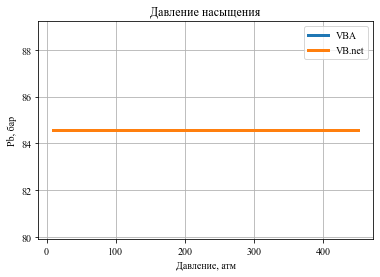

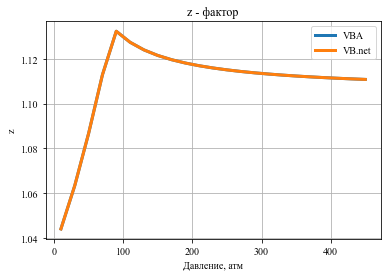

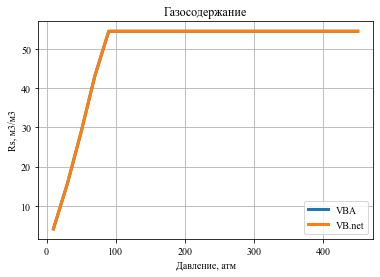

In [16]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

ys = [pb_list, pb_list_choke, z_list, z_list_choke, rs_list, rs_list_choke]
titles = ['Давление насыщения','z - фактор',  'Газосодержание']
ylabels = ['Pb, бар', 'z' , 'Rs, м3/м3']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

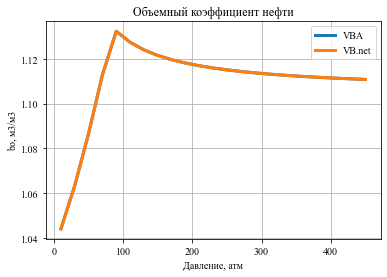

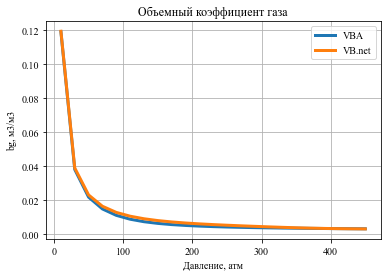

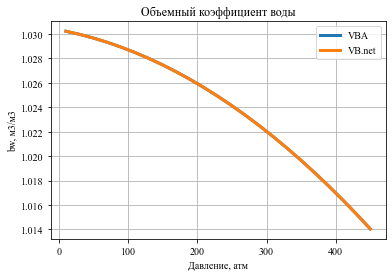

In [17]:
ys = [bo_list, bo_list_choke, bg_list, bg_list_choke, bw_list, bw_list_choke]
titles = ['Объемный коэффициент нефти','Объемный коэффициент газа', 'Объемный коэффициент воды']
ylabels = ['bo, м3/м3', 'bg, м3/м3' , 'bw, м3/м3']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

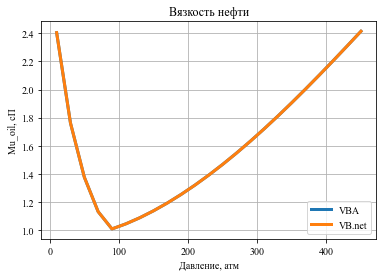

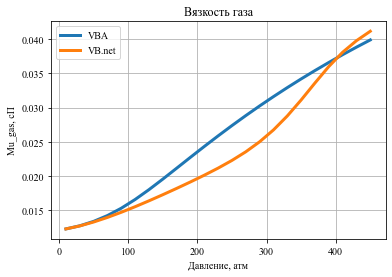

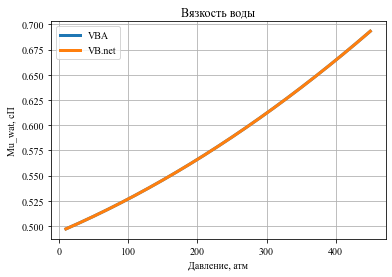

In [19]:
ys = [mu_oil_list, mu_oil_list_choke, mu_gas_list, mu_gas_list_choke, mu_wat_list, mu_wat_list_choke]
titles = ['Вязкость нефти','Вязкость газа', 'Вязкость воды']
ylabels = ['Mu_oil, сП', 'Mu_gas, сП' , 'Mu_wat, сП']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

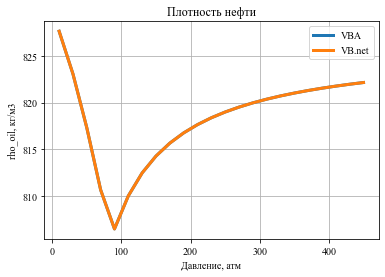

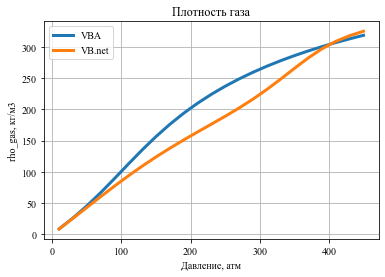

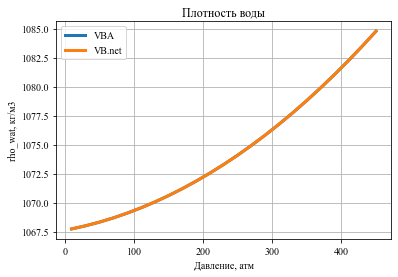

In [20]:
ys = [rho_oil_list, rho_oil_list_choke, rho_gas_list, rho_gas_list_choke, rho_wat_list, rho_wat_list_choke]
titles = ['Плотность нефти','Плотность газа',  'Плотность воды']
ylabels = ['rho_oil, кг/м3', 'rho_gas, кг/м3' , 'rho_wat, кг/м3']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

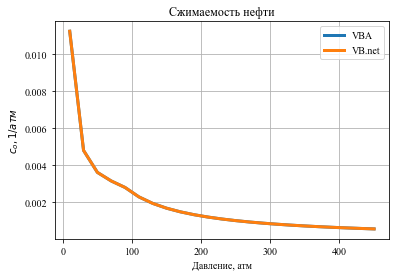

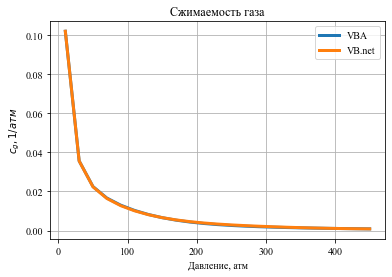

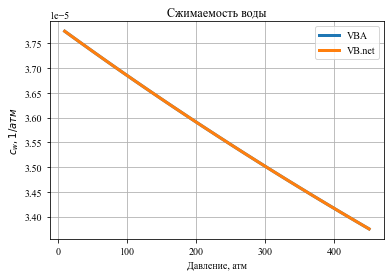

In [21]:
ys = [compr_oil_list, compr_oil_list_choke, compr_gas_list, compr_gas_list_choke, compr_wat_list, compr_wat_list_choke]
titles = ['Сжимаемость нефти','Сжимаемость газа',  'Сжимаемость воды']
ylabels = ['$c_o, 1/атм$', '$c_g, 1/атм$' , '$c_w, 1/атм$']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel(ylabels[i], color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

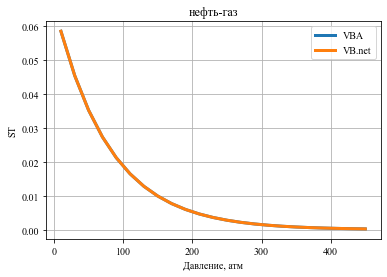

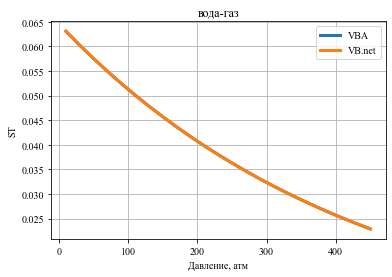

In [22]:
ys = [ST_og_list, ST_og_list_choke, ST_wg_list, ST_wg_list_choke]
titles = ['нефть-газ','вода-газ']
k = 0
for i in range(2):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel('ST', color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

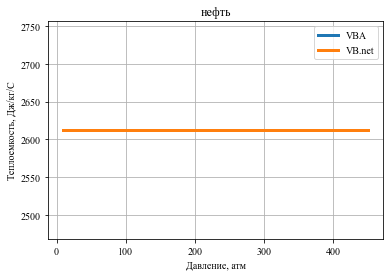

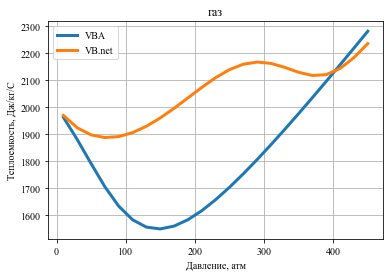

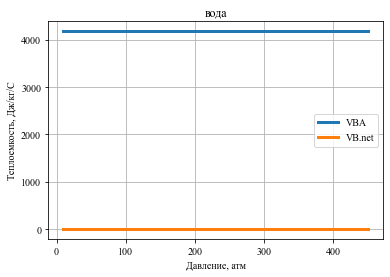

In [24]:
ys = [cpo_list, cpo_list_choke, cpg_list, cpg_list_choke, cpw_list, cpw_list_choke]
titles = ['нефть','газ', 'вода']
k = 0
for i in range(3):
    for j in range(2):
        plt.grid(True)
        plt.title(titles[i], color='black', family='fantasy')
        plt.ylabel('Теплоемкость, Дж/кг/С', color='black', family='fantasy')
        plt.xlabel('Давление, атм', color='black', family='fantasy')
        plt.plot(p_atm, ys[k], linewidth=3)  
        k += 1
    plt.legend(('VBA','VB.net')) 
    plt.show()

расчет корректирующего фактора (множителя) модели штуцера

In [30]:
print(choke_list)
print(choke_dll_list)

[0.00887444436907516, 0.026623333107225478, 0.0443722218453758, 0.06212111058352612, 0.07986999932167643, 0.09761888805982676, 0.11536777679797708, 0.1331166655361274, 0.15086555427427772, 0.16861444301242803]
[0.00887444436907546, 0.026623333107226397, 0.04437222184537732, 0.06212111058352826, 0.07986999932167914, 0.09761888805983006, 0.115367776797981, 0.1331166655361319, 0.15086555427428291, 0.16861444301243378]


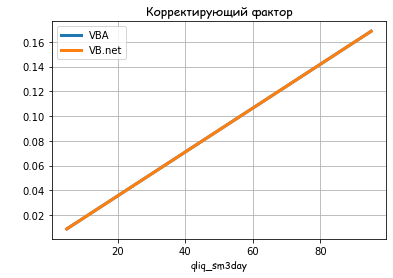

In [31]:
ys = [choke_list, choke_dll_list]
for i in range(2):
    plt.grid(True)
    plt.title('Корректирующий фактор', color='black', family='fantasy')
    plt.ylabel(' ', color='black', family='fantasy')
    plt.xlabel('qliq_sm3day', color='black', family='fantasy')
    plt.plot(q_arr, ys[i], linewidth=3)
plt.legend(('VBA','VB.net')) 
plt.show()